In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
import requests
requests.__version__

'2.22.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=67f5ffdc9f3b9208f2d054e49f2d721d


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | upata
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 11 of Set 1 | sorvag
City not found. Skipping...
Processing Record 12 of Set 1 | mahibadhoo
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | camacha
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | rungata
City not found. Skipping.

Processing Record 35 of Set 4 | pisco
Processing Record 36 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | flinders
Processing Record 39 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | jumla
Processing Record 42 of Set 4 | deputatskiy
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | sibolga
Processing Record 45 of Set 4 | bintulu
Processing Record 46 of Set 4 | inhambane
Processing Record 47 of Set 4 | marsa matruh
Processing Record 48 of Set 4 | jalu
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | tomatlan
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | mentok
City not found. Skipping...
Processing Record 4 of Set 5 | high level
Processing Record 5 of Set 5 | itoman
Processing Record 6 of Set 5 | narsaq

Processing Record 22 of Set 8 | walvis bay
Processing Record 23 of Set 8 | codrington
Processing Record 24 of Set 8 | stillwater
Processing Record 25 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 26 of Set 8 | namibe
Processing Record 27 of Set 8 | wagar
Processing Record 28 of Set 8 | severo-kurilsk
Processing Record 29 of Set 8 | trincomalee
Processing Record 30 of Set 8 | otradnoye
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | isabela
Processing Record 33 of Set 8 | hailar
Processing Record 34 of Set 8 | belem de sao francisco
Processing Record 35 of Set 8 | college
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | tabou
Processing Record 38 of Set 8 | bandarbeyla
Processing Record 39 of Set 8 | lipin bor
Processing Record 40 of Set 8 | hearst
Processing Record 41 of Set 8 | bambanglipuro
Processing Record 42 of Set 8 | volginskiy
City not found. Skipping...
Processing Record 43 of Set 8 | vargem grande
Processing

Processing Record 6 of Set 12 | gangotri
City not found. Skipping...
Processing Record 7 of Set 12 | sevilla
Processing Record 8 of Set 12 | hibbing
Processing Record 9 of Set 12 | vostok
Processing Record 10 of Set 12 | pitimbu
Processing Record 11 of Set 12 | warrnambool
Processing Record 12 of Set 12 | kuching
Processing Record 13 of Set 12 | loukhi
Processing Record 14 of Set 12 | djambala
Processing Record 15 of Set 12 | bethel
Processing Record 16 of Set 12 | kedrovyy
Processing Record 17 of Set 12 | muriwai beach
Processing Record 18 of Set 12 | nanakuli
Processing Record 19 of Set 12 | pergamino
Processing Record 20 of Set 12 | tilichiki
Processing Record 21 of Set 12 | birjand
Processing Record 22 of Set 12 | kuusamo
Processing Record 23 of Set 12 | houma
Processing Record 24 of Set 12 | port hawkesbury
Processing Record 25 of Set 12 | novobiryusinskiy
Processing Record 26 of Set 12 | dali
Processing Record 27 of Set 12 | diu
Processing Record 28 of Set 12 | ascension
Processi

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,48.00,90,92,1.99,NZ,2020-10-26 19:54:56
1,Ribeira Grande,38.52,-28.70,69.80,88,40,18.34,PT,2020-10-26 19:54:56
2,Upata,8.01,-62.40,81.97,77,88,4.65,VE,2020-10-26 19:54:57
3,Hermanus,-34.42,19.23,64.00,84,92,5.01,ZA,2020-10-26 19:54:57
4,Kapaa,22.08,-159.32,82.99,78,40,3.36,US,2020-10-26 19:54:57
5,Iqaluit,63.75,-68.51,15.80,72,75,2.24,CA,2020-10-26 19:54:58
6,Tuktoyaktuk,69.45,-133.04,8.60,84,75,16.11,CA,2020-10-26 19:54:58
7,Torbay,47.67,-52.73,41.00,44,40,12.75,CA,2020-10-26 19:54:58
8,Busselton,-33.65,115.33,57.00,75,25,7.83,AU,2020-10-26 19:54:58
9,Mahibadhoo,3.78,72.97,82.42,74,43,7.81,MV,2020-10-26 19:54:59


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
df = city_data_df[new_column_order]

In [14]:
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-10-26 19:54:56,-46.19,168.86,48.00,90,92,1.99
1,Ribeira Grande,PT,2020-10-26 19:54:56,38.52,-28.70,69.80,88,40,18.34
2,Upata,VE,2020-10-26 19:54:57,8.01,-62.40,81.97,77,88,4.65
3,Hermanus,ZA,2020-10-26 19:54:57,-34.42,19.23,64.00,84,92,5.01
4,Kapaa,US,2020-10-26 19:54:57,22.08,-159.32,82.99,78,40,3.36
...,...,...,...,...,...,...,...,...,...
535,Iberia,US,2020-10-26 19:57:47,29.95,-91.75,81.00,57,1,11.41
536,Washougal,US,2020-10-26 19:53:30,45.58,-122.35,48.99,33,0,3.06
537,Alice Springs,AU,2020-10-26 19:55:07,-23.70,133.88,53.60,37,0,5.82
538,Svetlyy,RU,2020-10-26 19:57:48,54.67,20.13,53.60,93,75,8.95


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603742268.4959989

In [18]:
today = time.strftime("%x")
today

'10/26/20'

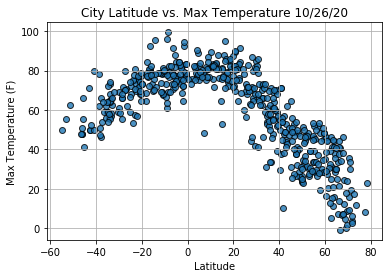

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


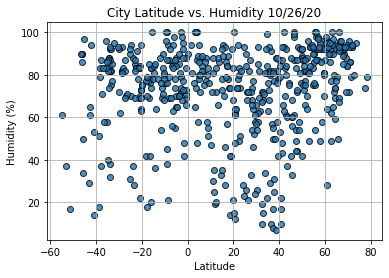

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


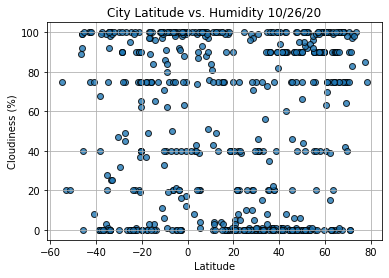

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

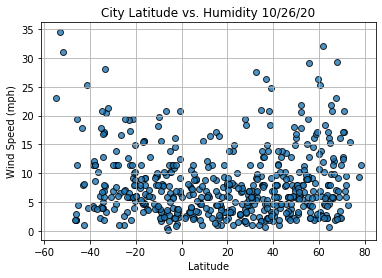

In [22]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

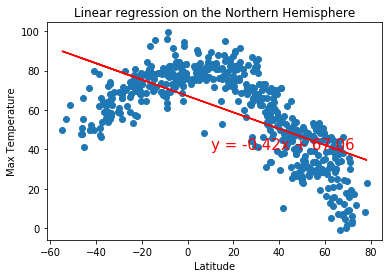

In [24]:
plot_linear_regression(lats, max_temps, "Linear regression on the Northern Hemisphere", "Max Temperature", (10,40))

In [25]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Lat                        -53.15
Lng                        -70.92
Max Temp                     55.4
Humidity                       37
Cloudiness                     20
Wind Speed                  34.45
Country                        CL
Date          2020-10-26 19:55:00
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
535     True
536     True
537    False
538     True
539    False
Name: Lat, Length: 540, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,48.00,90,92,1.99,NZ,2020-10-26 19:54:56
1,Ribeira Grande,38.52,-28.70,69.80,88,40,18.34,PT,2020-10-26 19:54:56
2,Upata,8.01,-62.40,81.97,77,88,4.65,VE,2020-10-26 19:54:57
3,Hermanus,-34.42,19.23,64.00,84,92,5.01,ZA,2020-10-26 19:54:57
4,Kapaa,22.08,-159.32,82.99,78,40,3.36,US,2020-10-26 19:54:57


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


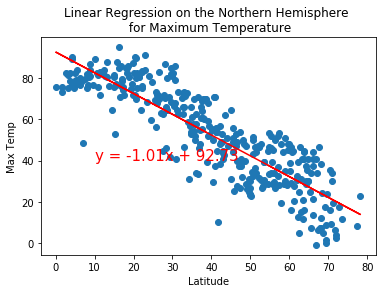

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))
                     
                

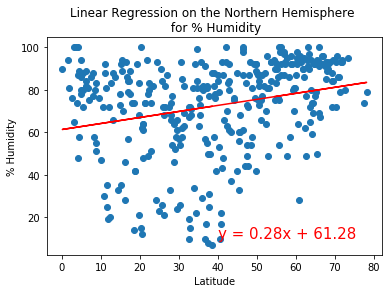

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

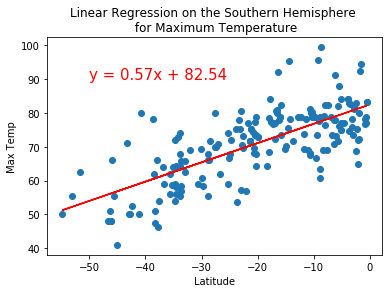

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

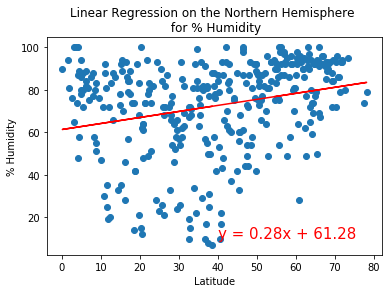

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

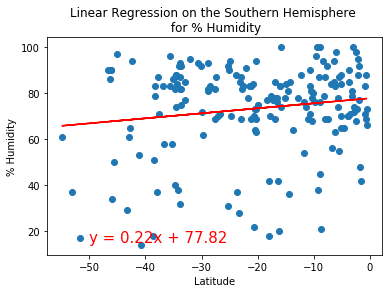

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


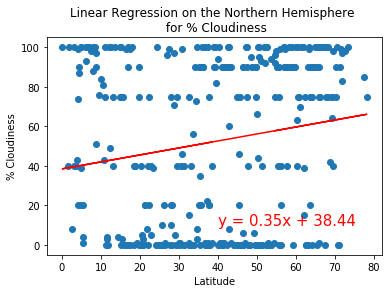

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

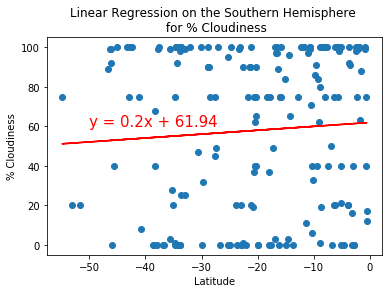

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", '% Cloudiness', (-50,60))


In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.06670924237240115


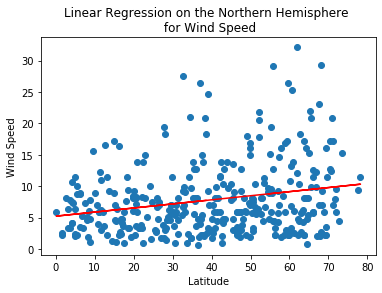

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [38]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.23197172772699834


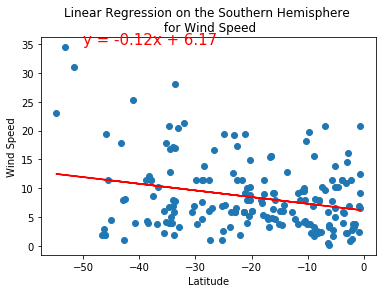

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
ax = plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))


In [40]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.2589186249066133
